In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('device41.csv',squeeze=True)

In [0]:
df.DateTime = pd.to_datetime(df.DateTime)
df = df.set_index("DateTime")

In [0]:
df = df.resample('30T').max()
df = df.fillna(method = 'ffill')
df.isna().sum()

pm25    0
dtype: int64

In [0]:
# df[:-24]
df

,pm25
DateTime,
2019-12-27 00:00:00,274.0
2019-12-27 00:30:00,260.0
2019-12-27 01:00:00,254.0
2019-12-27 01:30:00,256.0
2019-12-27 02:00:00,268.0
...,...
2020-01-03 21:30:00,286.0
2020-01-03 22:00:00,288.0
2020-01-03 22:30:00,299.0


In [0]:
train, test = df[:-24], df[-24:]

In [0]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [0]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input,sampling_rate=1, batch_size=6)

In [0]:
model = Sequential()
model.add(LSTM(4, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.14))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'acc'])

In [0]:
model.fit_generator(generator,epochs=40)

Epoch 1/40
60/60 [==============================] - 1s 23ms/step - loss: 0.2324 - mae: 0.4255 - acc: 0.0028
Epoch 2/40
60/60 [==============================] - 1s 16ms/step - loss: 0.1427 - mae: 0.3166 - acc: 0.0028
Epoch 3/40
60/60 [==============================] - 1s 17ms/step - loss: 0.0934 - mae: 0.2442 - acc: 0.0028
Epoch 4/40
60/60 [==============================] - 1s 16ms/step - loss: 0.0627 - mae: 0.1931 - acc: 0.0028
Epoch 5/40
60/60 [==============================] - 1s 17ms/step - loss: 0.0416 - mae: 0.1535 - acc: 0.0056
Epoch 6/40
60/60 [==============================] - 1s 16ms/step - loss: 0.0333 - mae: 0.1392 - acc: 0.0056
Epoch 7/40
60/60 [==============================] - 1s 17ms/step - loss: 0.0280 - mae: 0.1302 - acc: 0.0056
Epoch 8/40
60/60 [==============================] - 1s 17ms/step - loss: 0.0316 - mae: 0.1341 - acc: 0.0056
Epoch 9/40
60/60 [==============================] - 1s 15ms/step - loss: 0.0367 - mae: 0.1382 - acc: 0.0028
Epoch 10/40
60/60 [=========

In [0]:
pred_list = []
batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [0]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

In [0]:

# plt.figure(figsize=(20, 5))
# plt.plot(df_test.index, df_test['pm25'])
# plt.plot(df_test.index, df_test['Prediction'], color='r')
# plt.legend(loc='best', fontsize='xx-large')
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=16)
# plt.show()

In [0]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [7.93435132]


In [0]:
df_test.tail()

,pm25,Prediction
DateTime,,
2020-01-03 21:30:00,286.0,NaN
2020-01-03 22:00:00,288.0,NaN
2020-01-03 22:30:00,299.0,285.562329
2020-01-03 23:00:00,295.0,296.821441
2020-01-03 23:30:00,312.0,309.769947


## **Forecasting**



In [0]:
train = df

In [0]:
scaler.fit(train)
train = scaler.transform(train)

In [0]:
# n_input = 2
# n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input,sampling_rate=1, batch_size=6)

In [0]:
model.fit_generator(generator,epochs=100)

Epoch 1/100
64/64 [==============================] - 1s 18ms/step - loss: 0.0141 - mae: 0.0791 - acc: 0.0052
Epoch 2/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0189 - mae: 0.0876 - acc: 0.0026
Epoch 3/100
64/64 [==============================] - 1s 16ms/step - loss: 0.0152 - mae: 0.0829 - acc: 0.0026
Epoch 4/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0225 - mae: 0.0956 - acc: 0.0052
Epoch 5/100
64/64 [==============================] - 1s 16ms/step - loss: 0.0189 - mae: 0.0932 - acc: 0.0052
Epoch 6/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0190 - mae: 0.0913 - acc: 0.0052
Epoch 7/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0137 - mae: 0.0818 - acc: 0.0052
Epoch 8/100
64/64 [==============================] - 1s 18ms/step - loss: 0.0165 - mae: 0.0850 - acc: 0.0026
Epoch 9/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0173 - mae: 0.0863 - acc: 0.0052
Epoch 10/100
64/64 

In [0]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [0]:
from pandas.tseries.offsets import DateOffset

In [0]:
add_dates = [df.index[-1] + DateOffset(hours=x) for x in range(0,n_input+1)]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [0]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)

In [0]:
df_proj.tail(-4)

,pm25,Prediction
2019-12-27 02:00:00,268.0,NaN
2019-12-27 02:30:00,273.0,NaN
2019-12-27 03:00:00,259.0,NaN
2019-12-27 03:30:00,252.0,NaN
2019-12-27 04:00:00,220.0,NaN
...,...,...
2020-01-03 23:00:00,295.0,NaN
2020-01-03 23:30:00,312.0,NaN
2020-01-04 00:30:00,NaN,317.038322
2020-01-04 01:30:00,NaN,321.071671


No handles with labels found to put in legend.


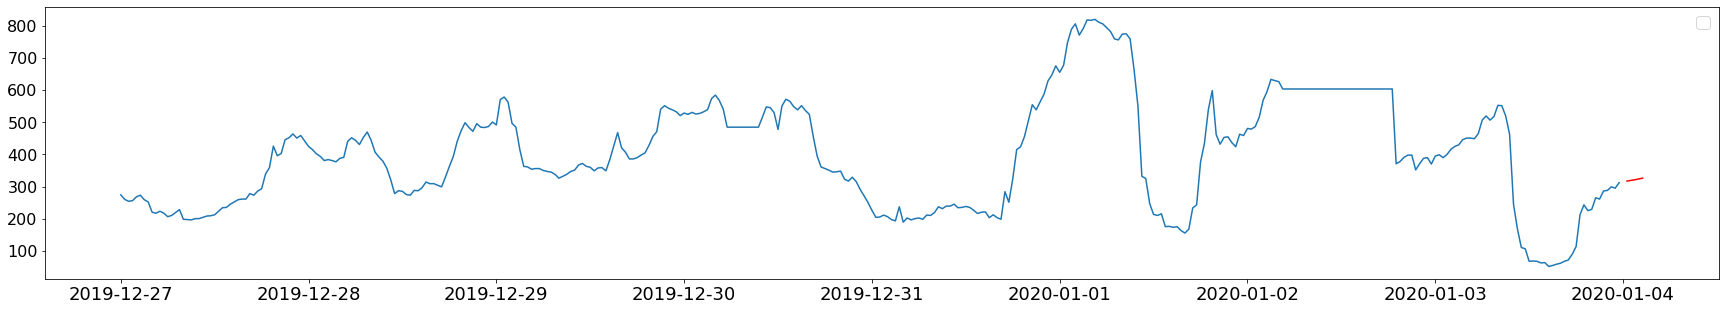

In [0]:

plt.figure(figsize=(30, 5))
plt.plot(df_proj.index, df_proj['pm25'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [0]:
# model.save('tnsf.h5')

In [0]:

# !pip install tensorflowjs
# !tensorflowjs_converter --input_format keras tnsf.h5 tfjs_model
